In [ ]:
import requests
import pandas as pd

from PIL import Image
import io



In [23]:
data = {'grant_type':'client_credentials'}

tk_res = requests.post(token_url, data=data, auth=(c_id, s_id))
tk = tk_res.json()['access_token']


In [24]:
headers = {'Authorization': f'Bearer {tk}'}

# Profile

In [ ]:
profile = requests.get(f'https://eu.api.blizzard.com/sc2/legacy/profile/2/1/{upatree}', headers=headers)

In [ ]:
profile.json()

In [ ]:
disNam = profile.json()['displayName']
port_offset = profile.json()['portrait']['offset']
port_url = profile.json()['portrait']['url']
port_num = port_url.split("/")[-1].split('-')[0]
port_offset = profile.json()['portrait']['offset']

sc_arc_url = f'https://static.sc2arcade.com/media/portraits/{port_num}-{port_offset}.png'

In [ ]:


imgUrl = port_url
r = requests.get(imgUrl, stream=True)
img = Image.open(io.BytesIO(r.content))

column = 19%6
row = 19//6

left = 152*column
top = 152*row
right = left+152
bottom = top+152

im_por = img.crop((left, top, right, bottom))
im_por

# Profile New

https://eu.api.blizzard.com/sc2/profile/2/1/3584949/ladder/summary?locale=en_US

In [ ]:
a = requests.get(f'https://eu.api.blizzard.com/sc2/profile/2/1/3584949?locale=en_US',headers=headers)

In [6]:
a.json()

{'summary': {'id': '3584949',
  'realm': 1,
  'displayName': 'UpATree',
  'clanName': 'UPA3',
  'clanTag': 'UPA3',
  'portrait': 'https://static.starcraft2.com/starport/bda9a860-ca36-11ec-b5ea-4bed4e205979/portraits/3-19.jpg',
  'decalTerran': 'https://static.starcraft2.com/starport/bda9a860-ca36-11ec-b5ea-4bed4e205979/decals/4-20.jpg',
  'decalProtoss': 'https://static.starcraft2.com/starport/bda9a860-ca36-11ec-b5ea-4bed4e205979/decals/2-25.jpg',
  'decalZerg': 'https://static.starcraft2.com/starport/bda9a860-ca36-11ec-b5ea-4bed4e205979/decals/2-50.jpg',
  'totalSwarmLevel': 72,
  'totalAchievementPoints': 730},
 'snapshot': {'seasonSnapshot': {'1v1': {'rank': 8,
    'leagueName': 'MASTER',
    'totalGames': 791,
    'totalWins': 381},
   '2v2': {'rank': -1, 'leagueName': None, 'totalGames': 0, 'totalWins': 0},
   '3v3': {'rank': -1, 'leagueName': None, 'totalGames': 0, 'totalWins': 0},
   '4v4': {'rank': -1, 'leagueName': None, 'totalGames': 0, 'totalWins': 0},
   'Archon': {'rank': 

In [9]:
imgUrl = 'https://static.starcraft2.com/starport/bda9a860-ca36-11ec-b5ea-4bed4e205979/portraits/3-19.jpg'
r = requests.get(imgUrl, stream=True)
img = Image.open(io.BytesIO(r.content))

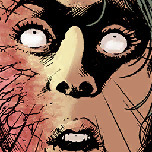

In [10]:
img

# Ladder Summary

In [11]:
ladder = requests.get('https://eu.api.blizzard.com/sc2/profile/2/1/3584949/ladder/summary?locale=en_US',headers=headers)

In [ ]:
ladder.json()

In [12]:
# ladder rankings
lrank = {'Bronze':1,'Silver':2,'Gold':3,'Platinum':4,'Diamond':5,'Master':6,'Grandmaster':7}
# player ranking and ladder id
pl_rk = -1
pl_id = -1
for ld in ladder.json()['allLadderMemberships']:
    lad_div = ld['localizedGameMode'].split(' ')[-1]
    if lrank[lad_div] > pl_rk:
        pl_rk = lrank[lad_div]
        pl_id = ld['ladderId']
ladder.json()['allLadderMemberships']

[{'ladderId': '263392', 'localizedGameMode': '1v1 Diamond', 'rank': 85},
 {'ladderId': '263934', 'localizedGameMode': '1v1 Master', 'rank': 8},
 {'ladderId': '263805', 'localizedGameMode': '1v1 Diamond', 'rank': 75}]

In [13]:
print(pl_rk, pl_id)

6 263934


# Ladder Specifics

In [14]:
ladder_sum = requests.get('https://eu.api.blizzard.com/sc2/profile/2/1/3584949/ladder/263934?locale=en_US', headers=headers)

In [ ]:
ladder_sum.json()

In [17]:
mmr = ladder_sum.json()['ranksAndPools'][0]['mmr'] 
rank = ladder_sum.json()['ranksAndPools'][0]['rank'] 

print(mmr, rank)


4674 8


In [16]:

race = ladder_sum.json()['ladderTeams'][rank-1]['teamMembers'][0]['favoriteRace']
wins = ladder_sum.json()['ladderTeams'][rank-1]['wins']
losses = ladder_sum.json()['ladderTeams'][rank-1]['losses']

print(race, wins, losses)

terran 380 395


# Match History

https://eu.api.blizzard.com/sc2/legacy/profile/2/1/3584949/matches

In [25]:
m_hist = requests.get('https://eu.api.blizzard.com/sc2/legacy/profile/2/1/3584949/matches', headers=headers)

In [ ]:
len(m_hist.json()['matches'])

25

In [ ]:
dd = pd.DataFrame(m_hist.json()['matches'])
dd.head()
dd = dd[dd['type']=='1v1']
dd['DateTime'] = pd.to_datetime(dd['date'],unit='s')



In [36]:
pd.to_datetime(dd['date'],unit='s')

0    2025-02-20 20:32:25
1    2025-02-20 20:21:04
2    2025-02-20 20:00:25
3    2025-02-20 19:41:37
4    2025-02-20 19:23:24
5    2025-02-20 19:03:33
6    2025-02-20 18:50:45
7    2025-02-20 18:31:10
8    2025-02-20 18:15:56
9    2025-02-20 18:02:59
10   2025-02-20 17:44:32
11   2025-02-20 17:22:16
12   2025-02-20 17:10:51
13   2025-02-20 16:51:51
16   2025-02-19 20:24:24
17   2025-02-19 20:00:38
18   2025-02-19 19:30:31
19   2025-02-19 19:07:05
20   2025-02-19 18:55:31
21   2025-02-19 18:39:11
22   2025-02-19 18:22:34
23   2025-02-19 17:57:16
24   2025-02-19 17:48:16
Name: date, dtype: datetime64[ns]